# Road PV pathfinder
Run a capacity-constrained road pathfinder to reach Wardrop Equilibrium.  
Based on Frank-Wolfe algorithm.

In [6]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

# START

In [7]:
import sys
sys.path.insert(0, r'../../../quetzal')
from quetzal.model import stepmodel
import pandas as pd

In [8]:
training_folder = '../../'
plot_path = training_folder + 'outputs/plot/'

1. Load `aon_pathfinder.zip` and `distribution.zip`.
2. Create a new model based on `aon_pathfinder`, with `distribution` volumes.

In [11]:
# each link can have its own capacity
sm.road_links['capacity'] = 2000

# column label 'volume_car' is used for road pathfinder
sm.volumes['volume_car'] = sm.volumes['car_owner']

constrained = sm.copy()
free = sm.copy()

In [12]:
constrained.step_road_pathfinder(maxiters=5, log=True, speedup=True, tolerance=0.01)

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  8.52it/s]


step: 0  moved = 100.0 %
relgap = 0.0 %


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  8.87it/s]


step: 1  moved = 41.4 %
relgap = 3.8 %


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:14<00:00,  7.82it/s]


step: 2  moved = 32.9 %
relgap = 0.9 %


In [13]:
constrained.car_los.head()

,origin,destination,path,node_path,link_path,ntlegs,time,iteration,phi,iterations,weight,ntleg_time,link_eq_time,eq_time,link_actual_time,actual_time,link_free_time,free_time
0,zone_0,zone_0,[zone_0],[],[],[],0.000000,0,1.00000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,zone_40,zone_37,"[zone_40, 340394504, 390306, 14950169, 2550387...","[340394504, 390306, 14950169, 255038747, 32206...","[174, 11939, 11441, 14801, 14969, 14966, 14460...","[(zone_40, 340394504), (24667525, zone_37)]",569.086649,0,1.00000,"(0, 1, 2)",1.000000,319.697310,252.496084,572.193395,252.400391,572.097701,249.389339,569.086649
2,zone_40,zone_106,"[zone_40, 340394504, 390306, 14950169, 2550387...","[340394504, 390306, 14950169, 255038747, 32206...","[174, 11939, 11441, 14801, 14969, 14966, 14460...","[(zone_40, 340394504), (60912644, zone_106)]",946.847464,0,1.00000,"(0, 1, 2)",1.000000,447.446828,502.529379,949.976206,502.432034,949.878861,499.400637,946.847464
3,zone_40,zone_38,"[zone_40, 340394504, 390306, 14950169, 2550387...","[340394504, 390306, 14950169, 255038747, 32206...","[174, 11939, 11441, 14801, 14969, 14966, 14460...","[(zone_40, 340394504), (258360211, zone_38)]",901.975349,0,1.00000,"(0, 1, 2)",1.000000,372.969413,532.133741,905.103154,532.036531,905.005944,529.005936,901.975349
4,zone_40,zone_31,"[zone_40, 340394504, 390306, 14950169, 2550387...","[340394504, 390306, 14950169, 255038747, 32206...","[174, 11939, 11441, 14801, 14969, 14966, 14460...","[(zone_40, 340394504), (206155600, zone_31)]",723.376081,1,0.41421,"(1, 2)",0.606752,324.029781,399.346300,723.376081,399.250924,723.280705,395.852308,719.882089


In [14]:
free.step_road_pathfinder(maxiters=1, log=True, speedup=False, tolerance=0.001)

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:11<00:00,  9.48it/s]


step: 0  moved = 100.0 %
relgap = 0.0 %


In [15]:
free.car_los.head()

,origin,destination,path,node_path,link_path,ntlegs,time,iteration,phi,iterations,weight,ntleg_time,link_eq_time,eq_time,link_actual_time,actual_time,link_free_time,free_time
0,zone_0,zone_0,[zone_0],[],[],[],0.000000,0,1.0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,zone_40,zone_37,"[zone_40, 340394504, 390306, 14950169, 2550387...","[340394504, 390306, 14950169, 255038747, 32206...","[174, 11939, 11441, 14801, 14969, 14966, 14460...","[(zone_40, 340394504), (24667525, zone_37)]",569.086649,0,1.0,"(0,)",1.0,319.697310,249.389339,569.086649,249.389339,569.086649,249.389339,569.086649
2,zone_40,zone_106,"[zone_40, 340394504, 390306, 14950169, 2550387...","[340394504, 390306, 14950169, 255038747, 32206...","[174, 11939, 11441, 14801, 14969, 14966, 14460...","[(zone_40, 340394504), (60912644, zone_106)]",946.847464,0,1.0,"(0,)",1.0,447.446828,499.400637,946.847464,499.400637,946.847464,499.400637,946.847464
3,zone_40,zone_38,"[zone_40, 340394504, 390306, 14950169, 2550387...","[340394504, 390306, 14950169, 255038747, 32206...","[174, 11939, 11441, 14801, 14969, 14966, 14460...","[(zone_40, 340394504), (258360211, zone_38)]",901.975349,0,1.0,"(0,)",1.0,372.969413,529.005936,901.975349,529.005936,901.975349,529.005936,901.975349
4,zone_40,zone_107,"[zone_40, 340394504, 390306, 14950169, 2550387...","[340394504, 390306, 14950169, 255038747, 32206...","[174, 11939, 11441, 14801, 14969, 14966, 14460...","[(zone_40, 340394504), (2282290896, zone_107)]",919.703248,0,1.0,"(0,)",1.0,269.506303,650.196944,919.703248,650.196944,919.703248,650.196944,919.703248


In [16]:
constrained.to_zip(training_folder + 'model/{scen}/constrained_road_pathfinder.zip'.format(scen=scenario))

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 39/39 [00:07<00:00,  5.19it/s]


# PLOT

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.55it/s]


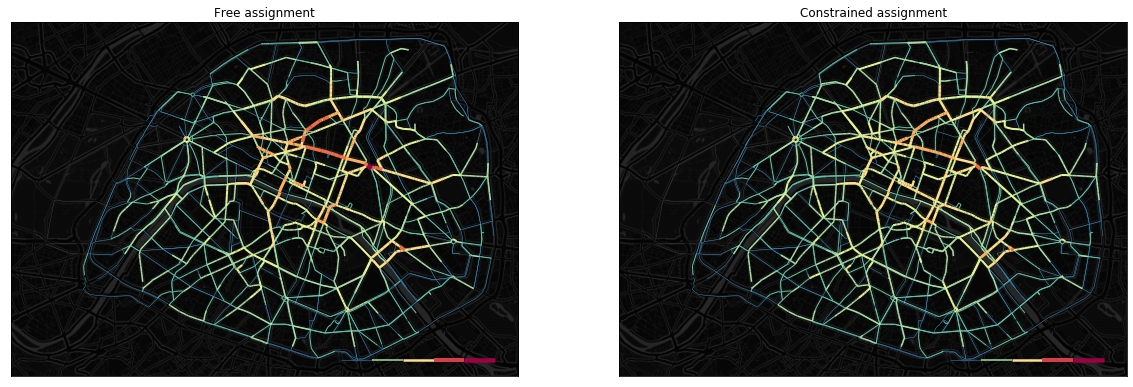

In [17]:
if manual:
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, axes = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=[20, 20])

    axes[0].set_aspect('equal')
    axes[1].set_aspect('equal')

    from syspy.syspy_utils import data_visualization as dv
    bandwidth = dv.bandwidth
    power=0.5
    lv = [100, 1000, 2000, 5000, 7000]

    url = 'http://a.basemaps.cartocdn.com/dark_nolabels/tileZ/tileX/tileY.png'
    plot = bandwidth(
        free.road_links.loc[free.road_links['flow'] > 0], value='flow',
        power=0.5, figsize=[25, 15], scale=0.5, legend_values=lv, 
        label_kwargs={'color':'white', 'fontsize':16}, ax=axes[0]
    )
    dv.add_basemap(plot, url=url, zoom=12)
    plot.set_title("Free assignment")

    plot = bandwidth(
        constrained.road_links.loc[constrained.road_links['flow'] > 0], value='flow',
        power=0.5, figsize=[25, 15], scale=0.5, legend_values=lv, 
        label_kwargs={'color':'white', 'fontsize':16}, ax=axes[1]
    )
    dv.add_basemap(plot, url=url, zoom=12)
    plot.set_title("Constrained assignment")
    fig.tigh_layout=True

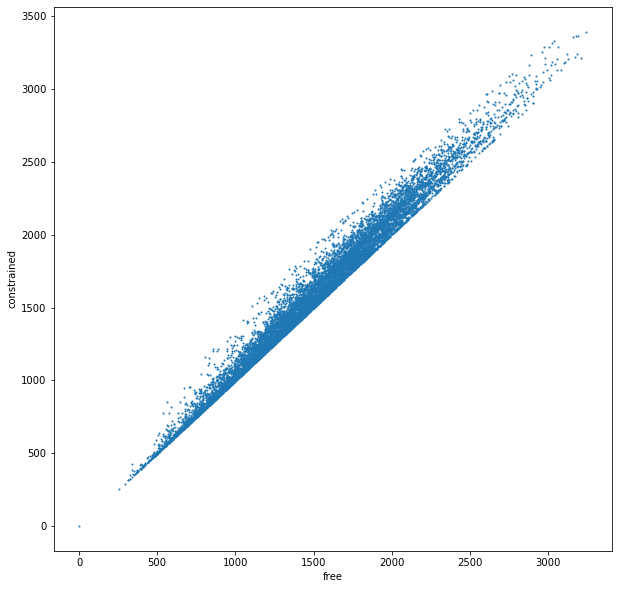

In [19]:
if manual:
    c = constrained.car_los.groupby(['origin', 'destination'])['actual_time'].min()
    f = free.car_los.groupby(['origin', 'destination'])['actual_time'].min()
    df = pd.DataFrame([c, f], index=['constrained', 'free']).T
    df.plot(kind='scatter', y='constrained', x='free', figsize=[10, 10], s=1)